<a href="https://colab.research.google.com/github/A-codinglee/dsss_hw_2/blob/main/exercise-09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert-block alert-info alert"> Hello! If this is your first assignment please read the following instructions:

Read the questions carefully and code what is asked in the respective code block whenever you see a ``` #TODO: YOUR CODE HERE. ```
It is important to do the Coding tasks IN ORDER, as the majority of coding blocks are dependent on the
previous coding blocks in the notebook.
Please also note that there is a **raise NotImplementedError()** for each task or function you have to
implement, so don't forget to remove it before testing your code, otherwise you will always get a "not
implemented" error.

You need to install required python packages before executing your codes. Simply run the block below to install it in the Colab environment of your Google account. Rerun the block when you are not sure they are properly installed.

You need to manually upload the data used in this exercise to Colab. Just create a folder 'data' and paste the respective files into this folder. Otherwise, you will get a 'File not found' error. You can find the data in StudOn.

Aside from coding blocks, there are also testing blocks to check whether your implementations
are correct, you can run them but do not change the code inside of them.
The tests are determined via the ASSERT STATEMENTS that you see on the testing blocks, which can help you
out during the coding of the exercises. If you pass all the visible asserts, you will probably get a good
grade on the exercise, just remember that there are also hidden tests, so hardcoding the assert statements
won't help you.

REMEMBER: This Colab notebook DOES NOT HAVE AN AUTOSAVE FUNCTION, so whenever you want to close it, please
remember to save it by clicking on the "file" tab in the upper left corner of the page, followed by
clicking on the "Save a copy to GitHub" button and selecting your corresponding GitHub repository:
"madlab-biosig/exercise-x-YourGitHubUsername"

Before you save the final version of your assignment, please make sure everything runs as expected.
First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all
cells** (in the menubar, select Cell$\rightarrow$Run All).
</div>

In [ ]:
!pip install pandas scipy==1.10 h5py==3.9.0 seaborn==0.13.2 scikit-learn==1.3.0 ipywidgets ipympl

In [1]:
from ipywidgets import Widget
Widget.close_all()

### BioSig Exercises WS 24/25
---

# Exercise 09

In [2]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
#matplotlib widget

# If you are using Jupyter Notebook¶
# %matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 40})
import pandas as pd
import numpy as np


In [3]:
from scipy import signal

In [4]:
def pole_zero_plot(b=None, a=None, sos=None, ax=None, print_pz=True):
    from matplotlib import patches
    if sos is not None:
        zeros, poles, _ = signal.sos2zpk(sos)
    else:
        zeros, poles, _ = signal.tf2zpk(b, a)
    if print_pz is True:
        print("zeros:\n", zeros, "\npoles:\n'", poles)

    # To visualize pole-zero plane: plot unit circle and x,y axis
    if not ax:
        plt.figure()
        ax = plt.subplot(1, 1, 1)

    # Check for duplicates poles or zeros
    import collections
    multi_pole = ((k, v) for k, v in collections.Counter(poles).items() if v > 1)
    multi_zeros = ((k, v) for k, v in collections.Counter(zeros).items() if v > 1)

    # plot circle
    circ = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)

    #plot axis
    ax.axhline(y=0, color='0.9')
    ax.axvline(x=0, color='0.9')

    # plot poles and zeros
    ax.plot(zeros.real, zeros.imag, 'o', markersize=9, alpha=0.5)
    ax.plot(poles.real, poles.imag, 'x', markersize=9, alpha=0.5)

    # Add label for duplicates
    import itertools
    for pos, c in itertools.chain(multi_pole, multi_zeros):
        ax.text(pos.real, pos.imag, c, fontsize=12)

    ax.axis('scaled')
    ax.axis([-1.5, 1.5, -1.5, 1.5])

    ax.set_xlabel('Re')
    ax.set_ylabel('Im')

def plot_freq_response(b=None, a=None, sos=None, sampling_rate=None, log_y=True,create_new_fig=True, label=None, unwrap=True):
    """Plot the freq response of a window.

    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        log_y: If True the y=axis will be in base 10 log.
        create_new_fig: If True a new figure is created for the plot
    """
    # Calculate the frequency response using scipy.signal.freqz
    # Use the fs parameter to calculate the output relative to the sampling rate
    if not sampling_rate:
        sampling_rate = 2 * np.pi

    if sos is not None:
        w, h = signal.sosfreqz(sos, fs=sampling_rate)
    else:
        w, h = signal.freqz(b, a, fs=sampling_rate)

    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()

    if log_y is True:
        h_plot = 20 * np.log10(abs(h))
        ax1.set_ylabel('Amplification [dB]', color='b')
    else:
        h_plot = abs(h)
        ax1.set_ylabel('Amplification [no unit]', color='b')

    ax1.plot(w, h_plot, 'b', label=label)
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.angle(h)
    angles = np.nan_to_num(angles)
    if unwrap:
        angles = np.unwrap(angles)
    ax2.plot(w, angles, 'g', label=label)
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')

## Ex 9.1: SOS-Filtering

In last exercise we learned that filters of high order can get numerically unstable.
A solution is to split a high-order filter into multiple filters of a lower order.
With SOS (second-order-section) filtering, we describe a higher order filter by filters of first or second order.

a) Create a “medium-order” Butterworth filter once using the parameter `output=’ba’`. Plot the pole-zero plot and the magnitude response of the filter.

b) Create the same filter using the parameter `output=’sos’`. Inspect the output. In how many sections was the filter divided?

Based on the documentation:
*Array of second-order filter coefficients, must have a shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.*

c) Plot the pole-zero-plots for each section and compare it to the original pole-zero-plot. Now, plot the magnitude response of each section and compare it.

d) Increase the filter order until the simple filter gets unstable. Create an SOS-filter with the same order and compare the outputs in the z-plane and regarding the magnitude response.

zeros:
 [-1.00674577+0.00330183j -1.00674577-0.00330183j -1.00154726+0.00727405j
 -1.00154726-0.00727405j -0.99535345+0.00568063j -0.99535345-0.00568063j
 -0.99270705+0.j        ] 
poles:
' [0.88986683+0.28188603j 0.88986683-0.28188603j 0.7974187 +0.20257022j
 0.7974187 -0.20257022j 0.74393428+0.1048779j  0.74393428-0.1048779j
 0.72654253+0.j        ]


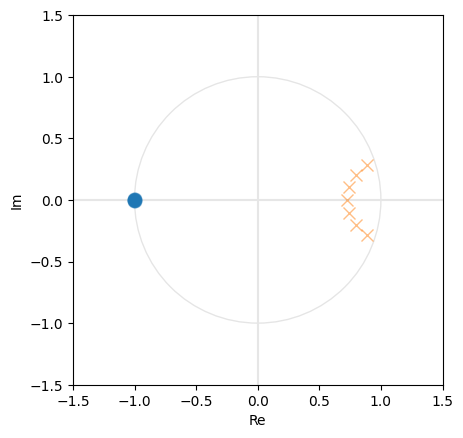

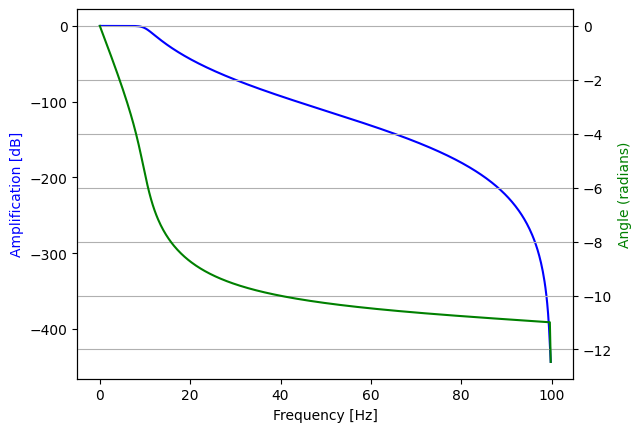

In [5]:
from scipy import signal

N = 7
Wn = 10  # Hz
sampling_rate = 200  # Hz
nyquist = sampling_rate / 2
# Create a butterworth filter using the `ba` output. Name the filter coefficients as 'b' and 'a'.

# YOUR CODE HERE
b, a = signal.butter(N, Wn/nyquist, btype='lowpass', analog=False)

# Plot the Pole-zero plot and the magnitude response. PLOTS ARE NOT GRADED!!
# YOUR CODE HERE
pole_zero_plot(b=b, a=a, print_pz=True)
plot_freq_response(b=b, a=a, sampling_rate=sampling_rate, log_y=True, create_new_fig=True, label="Butterworth Filter")

In [6]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert isinstance(b[0], np.float64), 'The datatype for filter coefficients is not correct'#data type assertion
assert abs(sum(b[0:2])-9.837199098515841e-06)< 1e-9, 'The first or second coefficient for b is wrong'
assert abs(sum(b[2:4])-6.886039368961089e-05)< 1e-9, 'The third or fourth coefficient for b is wrong'
assert abs(sum(b[0:3] - [9.22964989e-06, 8.60754921e-06, 2.58226476e-05])) < 1e-3, 'The first three coefficients are wrong.'
print('The first three coefficients are correct!')


The first three coefficients are correct!


In [7]:
# Create the same filter using `sos` output. Name to sos filter coefficients as 'sos'
# YOUR CODE HERE
sos = signal.butter(N, Wn / nyquist, btype='lowpass', analog=False, output='sos')
# Inspect the output
# YOUR CODE HERE
print(f"SOS coefficients ( shape {sos.shape}):\n", sos)


SOS coefficients ( shape (4, 6)):
 [[ 1.22964989e-06  2.45929977e-06  1.22964989e-06  1.00000000e+00
  -7.26542528e-01  0.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.48786856e+00  5.64437591e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.59483739e+00  6.76911275e-01]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  -1.77973365e+00  8.71322704e-01]]


In [8]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert isinstance(sos[0,1], np.float64), 'The datatype for filter coefficients is not correct'#data type assertion
assert abs(sum(sos[0][0:3] - [1.22964989e-06, 2.45929977e-06, 1.22964989e-06])) < 1e-3, 'Three coefficients of the sos filter are wrong.'
print('Three coefficients of the sos filter are correct!')


Three coefficients of the sos filter are correct!


Section 1 coefficients:
 [ 1.22964989e-06  2.45929977e-06  1.22964989e-06  1.00000000e+00
 -7.26542528e-01  0.00000000e+00]
zeros:
 [-1.+0.j -1.+0.j] 
poles:
' [0.72654253+0.j 0.        +0.j]
Section 2 coefficients:
 [ 1.          2.          1.          1.         -1.48786856  0.56443759]
zeros:
 [-1.+0.j -1.+0.j] 
poles:
' [0.74393428+0.1048779j 0.74393428-0.1048779j]
Section 3 coefficients:
 [ 1.          2.          1.          1.         -1.59483739  0.67691127]
zeros:
 [-1.+0.j -1.+0.j] 
poles:
' [0.7974187+0.20257022j 0.7974187-0.20257022j]
Section 4 coefficients:
 [ 1.          1.          0.          1.         -1.77973365  0.8713227 ]
zeros:
 [-1.+0.j  0.+0.j] 
poles:
' [0.88986683+0.28188603j 0.88986683-0.28188603j]


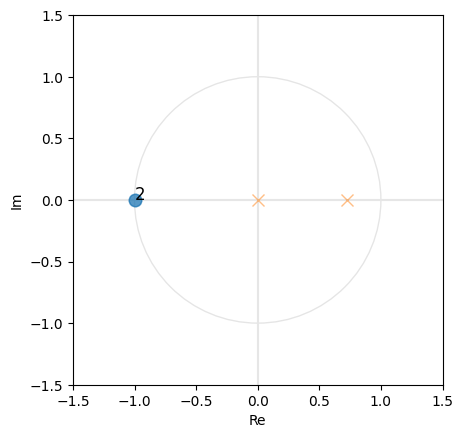

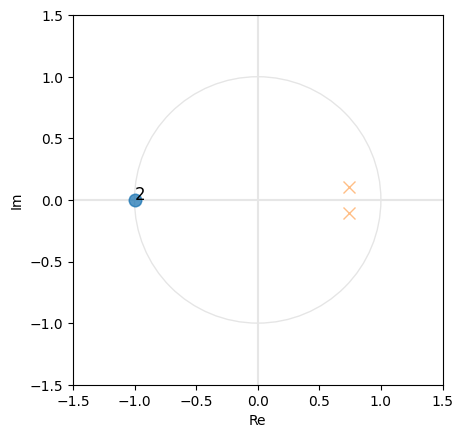

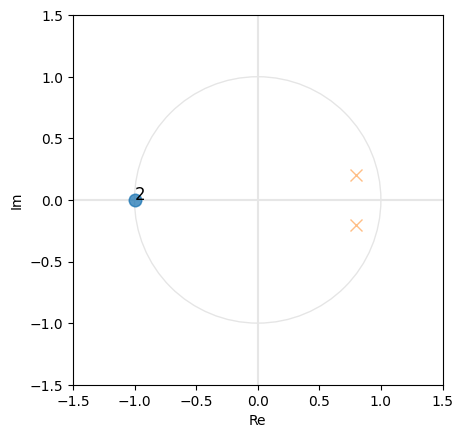

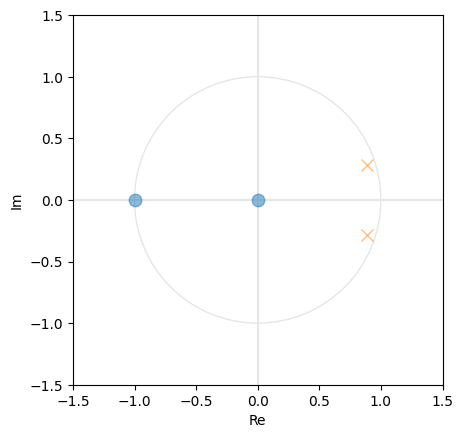

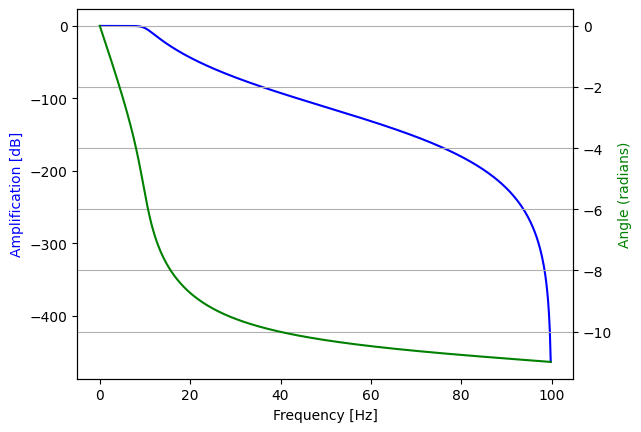

In [9]:
# Plot the pole zero plot for each section, PLOTS ARE NOT GRADED!!
# YOUR CODE HERE
for i, section in enumerate(sos):
  print(f"Section {i + 1} coefficients:\n", section)
  pole_zero_plot(sos=section[np.newaxis, :], print_pz=True)

# Plot the magnitude response of each sos section, PLOTS ARE NOT GRADED!!
# YOUR CODE HERE
plot_freq_response(sos=sos, sampling_rate=sampling_rate, log_y=True, create_new_fig=True, label="Butterworth Filter (sos)")

In [10]:
# Find a filter order N, where the traditional filter becomes unstable.
# Than repeat the analysis above using this N. Name the variable for filter order as 'N'.
# YOUR CODE HERE
max_order = 100

unstable = False
while N <= max_order:
  try:
    b, a = signal.butter(N, Wn / nyquist, btype='lowpass', analog=False)
    poles = np.roots(a)
    if np.any(np.abs(poles) > 1):
      unstable = True
      break
  except Exception as e:
    print(f"Error at order {N}: {e}")
    break
  N += 1


if unstable:
  print(f"Filter becomes unstable at order N = {N}")
else:
  print("No instability detected within the tested range.")

Filter becomes unstable at order N = 20


In [11]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

# Block for the hidden tests. This block can be skipped.

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1109: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


zeros:
 [ 0.+0.j  0.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j] 
poles:
' [0.72707163+0.01853517j 0.72707163-0.01853517j 0.73131257+0.05547079j
 0.73131257-0.05547079j 0.73983711+0.09199237j 0.73983711-0.09199237j
 0.75272762+0.12779062j 0.75272762-0.12779062j 0.77009974+0.16250526j
 0.77009974-0.16250526j 0.79209132+0.1957027j  0.79209132-0.1957027j
 0.81884503+0.22685249j 0.81884503-0.22685249j 0.85048217+0.2553034j
 0.85048217-0.2553034j  0.88706491+0.28026118j 0.88706491-0.28026118j
 0.92854379+0.30077212j 0.92854379-0.30077212j]

Section 1 coefficients (numerator and denominator):
 [ 1.31821644e-17  2.63643288e-17  1.31821644e-17  1.00000000e+00
 -1.45414326e+00  5.28976710e-01]
zeros:
 [0.+0.j 0.+0.j] 
poles:
' [0.72707163+0.01853517j 0.72707163-0.01853517j]

Section 2 coefficients (numerator and denominator):
 [ 1.          2.          1.          1.         -1.46262514  0

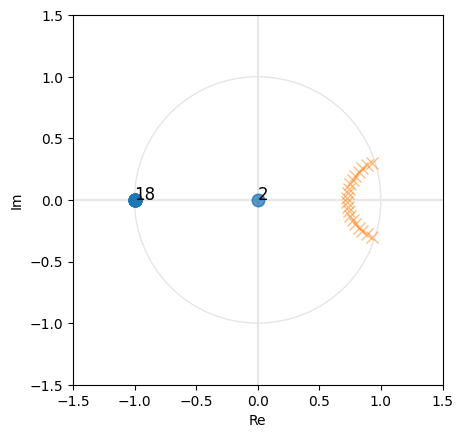

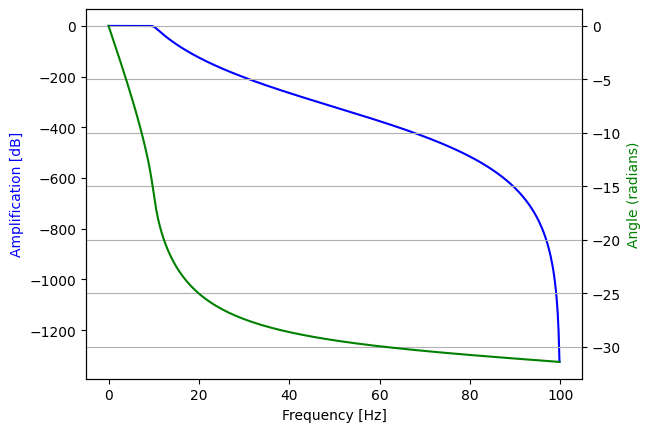

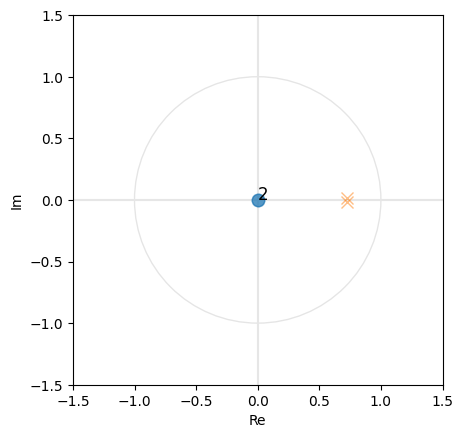

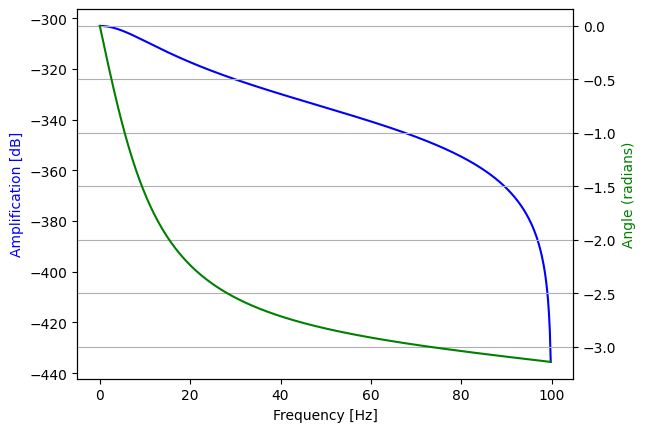

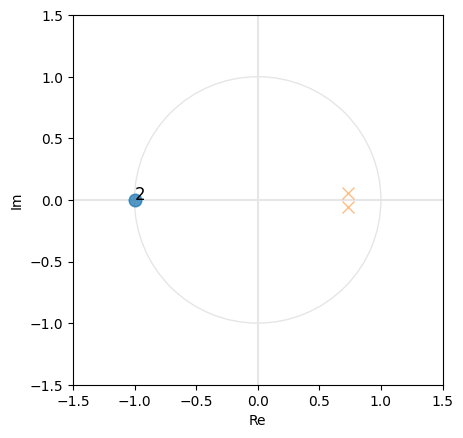

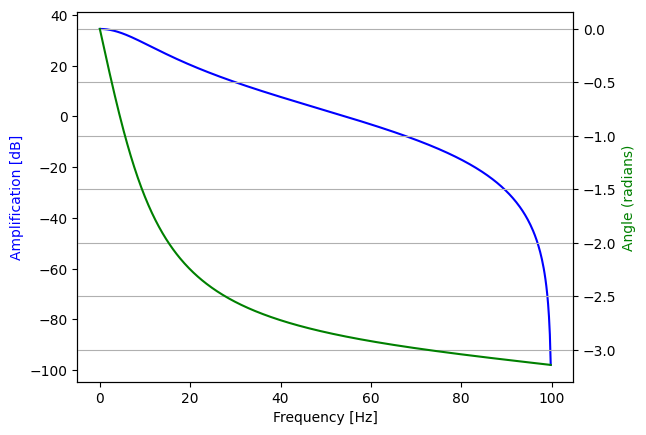

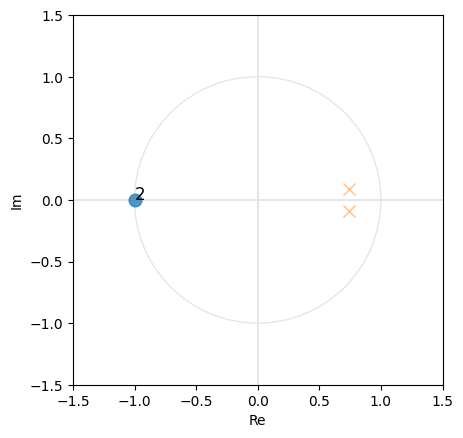

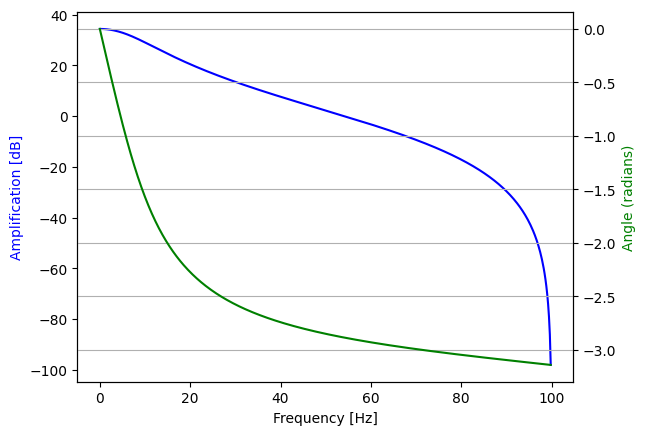

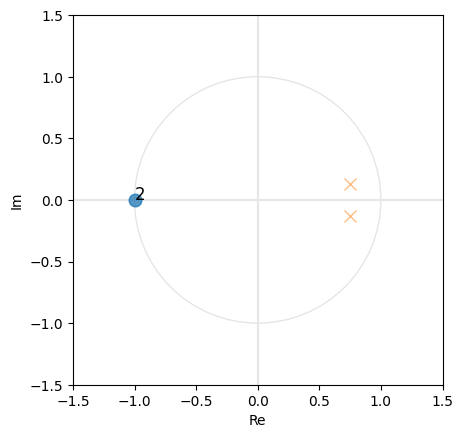

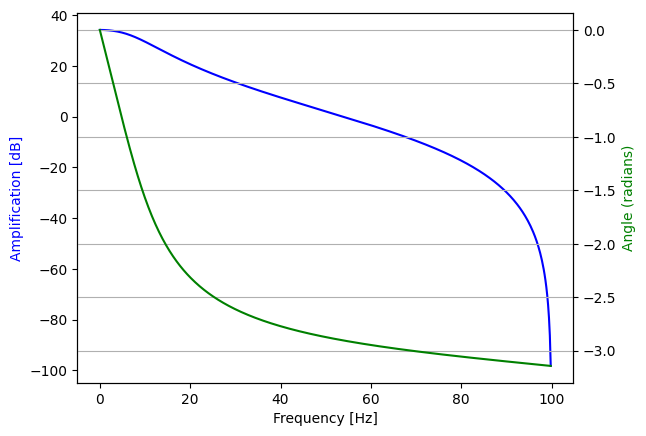

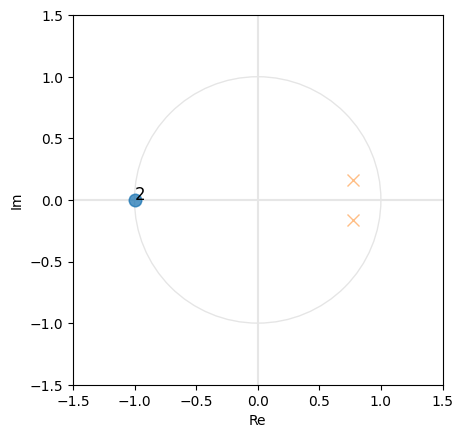

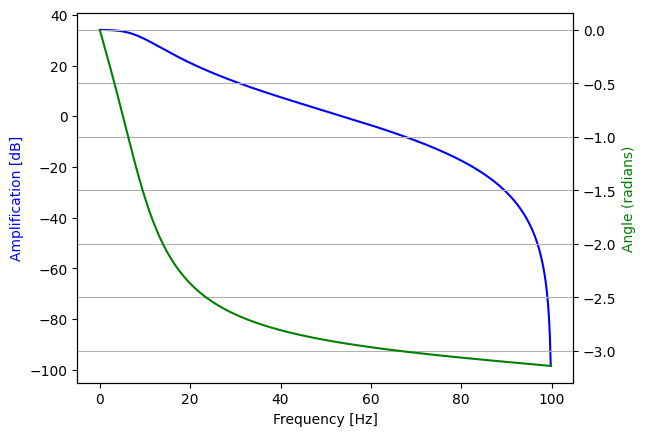

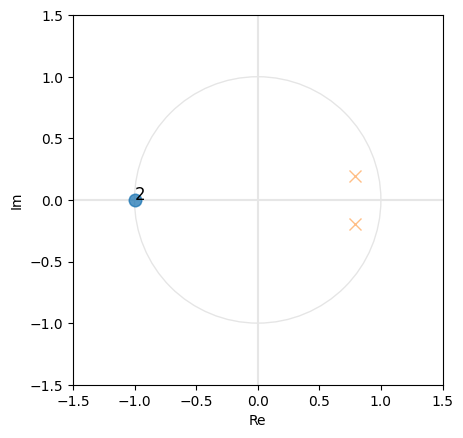

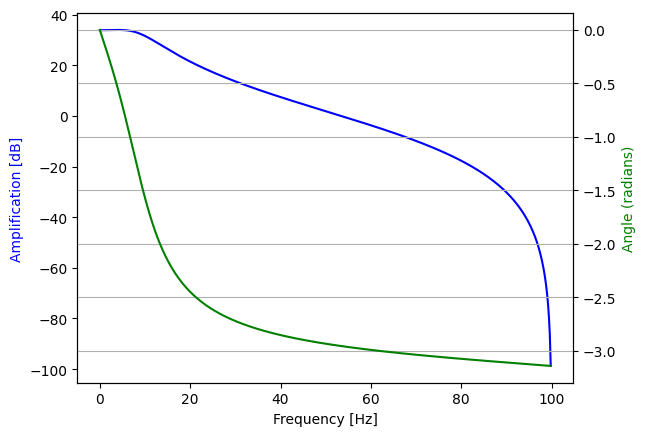

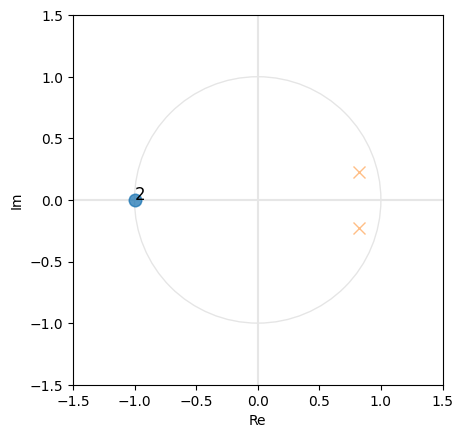

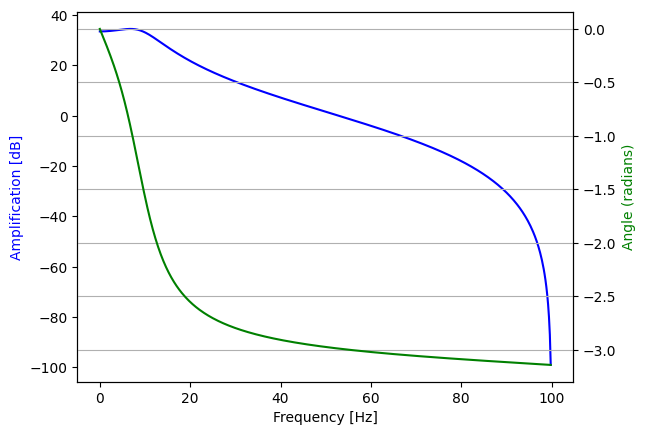

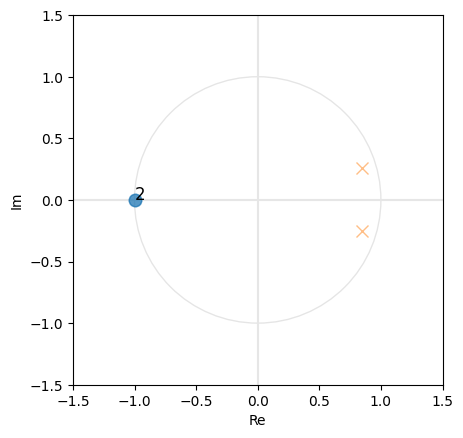

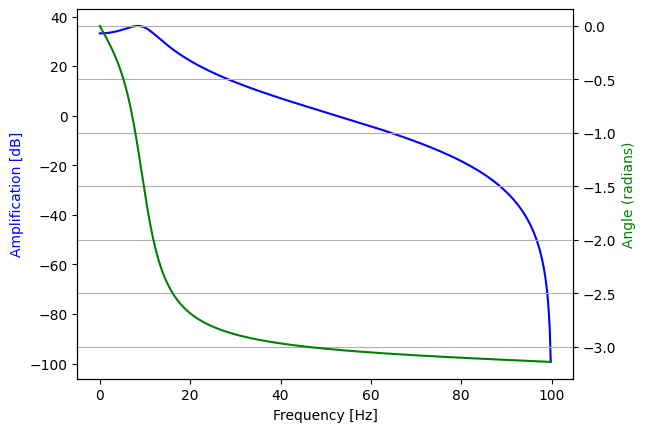

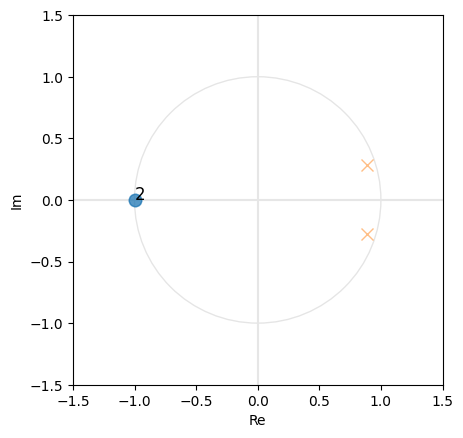

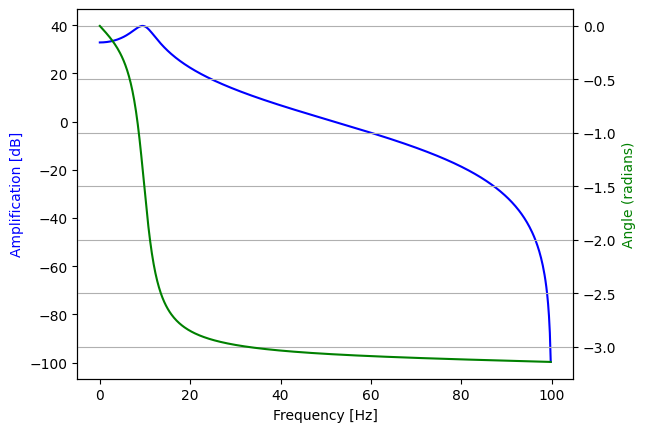

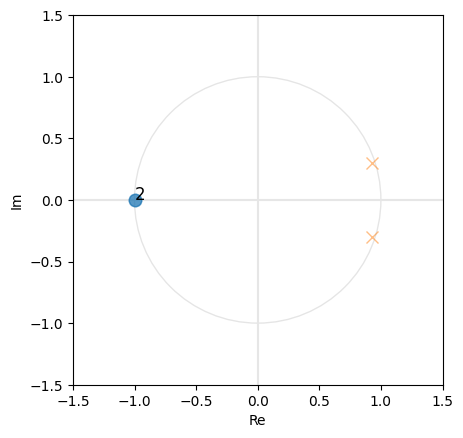

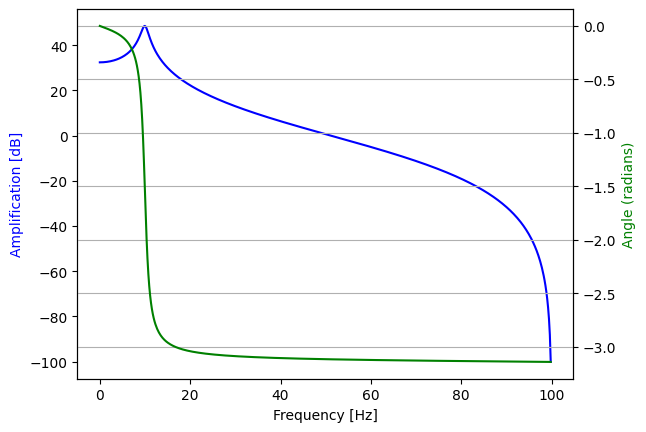

In [12]:
# Recreate the unstable filter as SOS
# Note that both, `pole_zero_plot` and the `plot_freq_response` have parameters to deal with sos intput.
# YOUR CODE HERE
sos = signal.butter(N, Wn / nyquist, btype='lowpass', analog=False, output='sos')

pole_zero_plot(sos=sos, print_pz=True)
plot_freq_response(sos=sos, sampling_rate=sampling_rate, log_y=True, create_new_fig=True, label="SOS Filter (Stable)")

for i, section in enumerate(sos):
  print(f"\nSection {i + 1} coefficients (numerator and denominator):\n", section)

  pole_zero_plot(sos=section[np.newaxis, :], print_pz=True)
  plot_freq_response(sos=section[np.newaxis, :], sampling_rate=sampling_rate, log_y=True, create_new_fig=True, label=f"SOS Section {i + 1}")

## Ex 9.2: Pan-Tompkins 1

The Pan-Tompkins algorithm is the most famous algorithm for detecting QRS complexes in ECG signals.
In the following we will implement the filter part of the Pan-Tompkins and apply it some ECG data that was recorded during the measurement exercise last year.

Use the lecture as reference for all parts of the filter cascade.

a) Implement the low-pass and high-pass component of the band-pass filter and apply it to the test data

b) Implement the differentiator and apply it to the test data

c) Square your test data

d) Implement the moving window integrator and apply it to the test signal


At every step you can use a pole-zero-plot to verify your implementation.

In [13]:
# Load one of the data files and extract the exg column
path = './data/example_ecg.csv'
orig_sampling_rate = 256.  # Hz
pan_sampling_rate = 200.  # Hz

ecg = pd.read_csv(path, header=1, skiprows=0, index_col='timestamp')['ecg']

# resample the data to 200 Hz for the algorithms
ecg = pd.Series(signal.resample(ecg, int(len(ecg) * pan_sampling_rate/orig_sampling_rate)))
ecg.index /= pan_sampling_rate

# For visualisation and testing select part of the signal
ecg_part = ecg.loc[150:170]

plt.figure()
ecg_part.plot()
plt.xlabel('time [s]');

FileNotFoundError: [Errno 2] No such file or directory: './data/example_ecg.csv'

### Bandpass Filter Part 1: Low-pass

### Hint:

From the lecture we know that the used low-pass filter has the following transfer function:

$y(n) = 2\cdot y(n-1) - y(n-2) + \frac{1}{32} \cdot (x(n) - 2\cdot x(n-6) + x(n-12))$

this leads to a transfer function of:

$H(z) = ...$

and finally to the following coefficients:

```
a_lowpass = [...]
b_lowpass = [...]
```

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot, POLE ZERO PLOTS ARE NOT GRADED!!
# Store the filter coefficients in 'b_lowpass' and 'a_lowpass'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert isinstance(b_lowpass[0], np.float64), 'The datatype for filter coefficients is not correct, it should be numpy.float64'#data type assertion

assert b_lowpass[12] == 1. / 32, 'The last coefficient of b of the lowpass filter is wrong.'
assert a_lowpass[2] == 1.0, 'The last coefficient of a of the lowpass filter is wrong.'
print('The last coefficients of a and b of the lowpass filter are correct')


In [ ]:
# Filter the ECG sample with the lowpass filter
# Store the filtered signal in variable 'data_lp'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert abs(sum(data_lp[0:2000])  + 260430.375538306) < 1e-3, 'Samples from the first half of the lowpass filtered signal is wrong'
print('Samples from the first half of the lowpass filtered signal is correct')


### Bandpass Filter Part 2: High-pass

### Hint:

From the lecture we know that the high-pass can be described by combining an all-pass with a low-pass filer.
The following function describes the low-pass component:

$y_{lp}(n) = y_{lp}(n-1) + x(n) - x(n-32)$

From this we can calculate the transfer function:

$H_{lp}(z) = ...$

When we substitute this into the overall transfer function, we got from the lecture, we get:

$H_{hp}(z) = ...$

And finally, the parameters:

```
a_highpass = [...]
b_highpass = [...]
```

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot, PLOTS ARE NOT GRADED!!
# Store the filter coefficients in 'b_highpass' and 'a_highpass'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert isinstance(b_highpass[0], np.float64), 'The datatype for filter coefficients is not correct, it should be numpy.float64'#data type assertion
assert b_highpass[32] == 1 / 32, 'The last coefficient of b of the highpass filter is wrong.'
assert a_highpass[1] == -1, 'The last coefficient of a of the highpass filter is wrong.'
print('The last coefficients of a and b of the highpass filter are correct')



In [ ]:
# Apply the filter to the already lowpassed filter data and plot the result, PLOTS ARE NOT GRADED!!
# Store the filtered signal in variable 'data_hp'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert isinstance(data_hp[0], np.float64), 'The datatype for filter coefficients is not correct, it should be numpy.float64'#data type assertion
assert abs(sum(data_hp[0:2000]) + 1457.7448013744804) < 1e-3, 'Samples from the first half of the highpass filtered signal is wrong'
print('Samples from the first half of the highpass filtered signal is correct')



### Derivative Operator

### Solution:

From the lecture we know that the derivative operator can be described by the following equation:

$y(n) = \frac{1}{8}\left[2x(n)+x(n-1)-x(n-3)-2x(n-4)\right]$

From this we can calculate the transfer function:

$H(z) = ...$

And finally, the parameters:

```
a_diff = [...]
b_diff = [...]
```

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot
# Store the filter coefficients in 'b_diff' and 'a_diff'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert isinstance(a_diff[0], np.float64), 'The datatype for filter coefficients is not correct, it should be numpy.float64'#data type assertion
assert isinstance(b_diff[0], np.float64), 'The datatype for filter coefficients is not correct, it should be numpy.float64'#data type assertion
assert a_diff[4] == 0, 'The last coefficient of a of the derivative operator is wrong.'
assert b_diff[4] == -1./4, 'The last coefficient of b of the derivative operator is wrong.'
print('The last coefficients of a and b of the derivative operator is correct.')



In [ ]:
# Apply the filter to the already bandpassed filter data and plot the result, PLOTS ARE NOT GRADED!!
# Store the filtered signal in variable 'data_diff'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert abs(sum(data_diff[0:2000]) + 189.16038490248738) < 1e-3, 'Samples from the first half of the signal after the derivative operator is wrong'
print('Samples from the first half of the signal after the derivative operator is correct')



### Squaring

In [ ]:
# Square the signal and plot the result
# Store the squared signal in variable 'data_sq'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert abs(sum(data_sq) - 240206591.26385316) < 1e-3, 'Samples from the first half of the squared signal is wrong'


### Moving Window Integrator

### Hint:

From the lecture we know the transfer function:

$y(n) = \frac{1}{30}\left[x(n-29) + x(n-28) + ... +x(n)\right]$

From this we can calculate the transfer function:

$H(z) = ...$

And finally, we can read of the parameters:

```
a = [...]
b = [...]
```

In [ ]:
# Design the filter based on the transfer function given in the lecture
# and produce a pole-zero and a magnitude response plot, PLOTS ARE NOT GRADED!!
# Store the filter coefficients in 'b_int' and 'a_int'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert a_int[29] == 0, 'The last coefficient of a of the moving window integrator is wrong.'
assert b_int[29] == 1/30, 'The last coefficient of b of the moving window integrator is wrong.'
print('The last coefficients of a and b of the moving window integrator are correct.')


In [ ]:
# Apply the filter to the sqaured data and plot the result, PLOTS ARE NOT GRADED!!
# Store the filtered signal in variable 'data_final'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
##~DO NOT MODIFY THE LINES OF CODE IN THIS BLOCK

assert abs(sum(data_final[0:2000]) - 125808438.65881383) < 1e-3, 'Samples from the first half of the signal after the moving window integrator is wrong'
print('Samples from the first half of the signal after the moving window integrator is correct')
